# ECE657A Homework 3
## Juan Manuel Gomez Gonzalez

Python 3.7 was used for this homework, in Windows 10 using Anaconda, Visual Studio Code and Jupyter Notebook. The pandas, numpy, and matplotlib libraries for Python were used.

The Pandas 10 minute tutorial, Pandas Cheat Sheet and Pandas CookBook were used to learn how to use the basic functions of Pandas. These documents can be obtained from [1]. Numpy’s statistical and linear algebra functions were also used, and their information can be seen in [2] and [3], respectively. Matplotlib’s API guide [4] was used for the plotting component of the homework.

In [1]:
@hidden_cell
import pandas as pd #Import pandas
import numpy as np #Import numpy
import matplotlib.pyplot as plt #Import matplotlib
import warnings #Import python's warnings library
warnings.simplefilter('ignore') #Disable the warnings for better visibility of the notebook

The Communities and Crime Data Set was used for this homework, and can be found in [5], with information relating to its origin in [6]. In the information mentioned before it is said that the first 5 columns of the dataset contain non-predictive information related to the location of the samples.
Opening the dataset in a text processor shows that the values are separated by a comma, with missing data and no headers. Therefore, the parameter of "header = None" must be used.

In [2]:
df_crime = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header = None) #Load the crime data set
df_crime.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


The headers can be found in [6], but not in an easy to load format. The notebook can try and load the headers if the accompanying file is in the same root folder as the current notebook:

In [3]:
import os #Import os functions
exists = os.path.isfile('headers.txt') #Check if the headers.txt file is in the same directory as the notebook
if exists:
    df_headers = pd.read_csv('headers.txt', header = None) #Load the headers into another DataFrame
    df_crime.columns = df_headers[0] #Assign the column names as the data in the headers DataFrame
else:
    print('Header file not found, continuing without the headers in the pandas DataFrame')

In [4]:
df_crime.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [5]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 128 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(2), object(26)
memory usage: 1.9+ MB


If the notebook found the header.txt file, the DataFrame now includes the header information but still has the missing data labeled as "?". As the eigenvalues and eigenvectors cannot be calculated with numpy's Linear Algebra function if it has string values, those values should be replaced with Numpy's version of Not a Number("NaN"), so that it knows how to manipulate those missing values. Also, as mentioned in the information related to the dataset found in [6], the fifth column, called "fold", was used for crossvalidation and does not give any useful information, and therefore can be removed from the dataset using pandas' drop() method.

In [6]:
df_crime = df_crime.drop(columns = df_crime.columns.values[4])
df_crime = df_crime.replace(to_replace = '?', value=np.nan) #Replace '?' with NaN
df_crime.head()

,state,county,community,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In order to obtain the eigenvalues and eigenvectors of the data set, its covariance matrix must be calculated, as indicated in [7]. The problem is that the first 5 columns of the dataset contain information on the location of where each sample was obtained and cross validation information, but it has missing values and it is not normalized, which would cause bias in the calculation of the eigenvalues.

One approach to solving this problem is by making those variables dummy variables (in other words, one-hot encoding them) and by eliminating the samples containing missing values in the categorical features (they can't be replaced with the average or the median as they would bias the dataset). The problem with this approach is that the dataset has many missing values in those columns:

In [7]:
df_crime.isna().sum()

0
state                      0
county                  1174
community               1177
communityname              0
population                 0
householdsize              0
racepctblack               0
racePctWhite               0
racePctAsian               0
racePctHisp                0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
numbUrban                  0
pctUrban                   0
medIncome                  0
pctWWage                   0
pctWFarmSelf               0
pctWInvInc                 0
pctWSocSec                 0
pctWPubAsst                0
pctWRetire                 0
medFamInc                  0
perCapInc                  0
whitePerCap                0
blackPerCap                0
indianPerCap               0
AsianPerCap                0
OtherPerCap                1
                        ... 
PctSameHouse85             0
PctSameCity85              0
PctSameState85             0
LemasSwornFT

At least 1777 samples of the 1994 would be lost using this approach. A second approach would be to remove the categorical data columns with many missing values, so as to still have many samples but losing some features of the dataset to analyze. Both of these approaches will now be evaluated.

## First Approach: Removing the NAN samples found in the first 4 columns
To remove samples with NaN values, the function drop.na() can be used. Imputing the parameter that it should look for and remove NaNs from the first 5 columns will limit the amount of lost data:

In [8]:
df_crime_second_approach = df_crime #Make a copy of the dataset before trying the first approach
categorical_columns = list(df_crime.columns.values[0:4]) #Obtain the column names of the columns that are not averaged
df_crime = df_crime.dropna(subset = categorical_columns) #Drop the NaNs from the first 4 columns
df_crime.head()

,state,county,community,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
3,34,5,81440,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.0,NaN,0.12
4,42,95,6096,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.03
6,44,7,41500,Lincolntown,0.01,0.39,0.00,0.98,0.06,0.02,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.0,NaN,0.03
12,25,21,44105,Needhamtown,0.03,0.47,0.01,0.96,0.13,0.02,...,0.03,0.18,0.59,NaN,NaN,NaN,NaN,0.0,NaN,0.06
13,55,87,30075,GrandChutetown,0.01,0.44,0.00,0.98,0.04,0.01,...,0.08,0.04,0.00,NaN,NaN,NaN,NaN,0.0,NaN,0.09


In [9]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 3 to 1992
Columns: 127 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int64(1), object(26)
memory usage: 817.0+ KB


817 of the initial 1994 rows remain. Afterwards, the "communityname" column must be labeled as to not have categorical data represented as numerical data, so that afterwards all the values in the DataFrame can be converted to numerical:

In [10]:
from sklearn.preprocessing import LabelEncoder #import the label encoder
labelencoder_df_crime = LabelEncoder() #Create a variable with class LabelEncoder
#Encode the communityname label:
df_crime.loc[:,categorical_columns[3]] = labelencoder_df_crime.fit_transform(df_crime.loc[:,categorical_columns[3]])
df_crime #Show the DataFrame

,state,county,community,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
3,34,5,81440,765,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,53,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
6,44,7,41500,322,0.01,0.39,0.00,0.98,0.06,0.02,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
12,25,21,44105,426,0.03,0.47,0.01,0.96,0.13,0.02,...,0.03,0.18,0.59,NaN,NaN,NaN,NaN,0.00,NaN,0.06
13,55,87,30075,237,0.01,0.44,0.00,0.98,0.04,0.01,...,0.08,0.04,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.09
15,19,187,91370,207,0.03,0.34,0.06,0.93,0.03,0.03,...,0.04,0.15,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.30
16,36,1,1000,2,0.15,0.31,0.40,0.63,0.14,0.06,...,0.06,0.39,0.84,0.06,0.06,0.91,0.5,0.88,0.26,0.49
17,34,27,17650,154,0.01,0.53,0.01,0.94,0.20,0.03,...,0.03,0.09,0.21,NaN,NaN,NaN,NaN,0.00,NaN,0.07
19,42,129,66376,573,0.00,0.41,0.05,0.96,0.01,0.01,...,0.09,0.03,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.03
23,19,193,93926,607,0.11,0.43,0.04,0.89,0.09,0.06,...,0.16,0.12,0.07,0.04,0.01,0.81,1,0.56,0.09,0.63


Pandas does not recognize the columns with NaN as numeric but as objects:

In [11]:
df_crime.info() #Show the information related to the DF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 3 to 1992
Columns: 127 entries, state to ViolentCrimesPerPop
dtypes: float64(100), int32(1), int64(1), object(25)
memory usage: 813.8+ KB


Therefore, the NaNs in those columns cannot be replaced with the average of its column. A solution to this problem is to apply the pandas method to_numeric() with the parameter errors='coerce' to the whole DataFrame so that the pandas' fillna() function can be used afterwards to fill the values with the mean of each column:

In [12]:
df_crime = df_crime.apply(pd.to_numeric, errors='coerce') #Force the object types as numerical
df_crime = df_crime.fillna(df_crime.mean()) #Replace the NaNs with the average of each column
df_crime.info() #Show the information related to the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 3 to 1992
Columns: 127 entries, state to ViolentCrimesPerPop
dtypes: float64(123), int32(1), int64(3)
memory usage: 813.8 KB


Afterwards, the categorical data must be converted to dummy variables ("One Hot Encoding") so as to not bias the covariance matrix:

In [13]:
df_crime = pd.get_dummies(df_crime,columns=categorical_columns) #Onehotencode the categorical columns
df_crime #Show the DataFrame

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,communityname_782,communityname_783,communityname_784,communityname_785,communityname_786,communityname_787,communityname_788,communityname_789,communityname_790,communityname_791
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0,0,0,0,0,0,0,0,0,0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0,0,0,0,0,0,0,0,0,0
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0,0,0,0,0,0,0,0,0,0
12,0.03,0.47,0.01,0.96,0.13,0.02,0.29,0.32,0.20,0.52,...,0,0,0,0,0,0,0,0,0,0
13,0.01,0.44,0.00,0.98,0.04,0.01,0.35,0.53,0.32,0.23,...,0,0,0,0,0,0,0,0,0,0
15,0.03,0.34,0.06,0.93,0.03,0.03,0.39,0.41,0.28,0.58,...,0,0,0,0,0,0,0,0,0,0
16,0.15,0.31,0.40,0.63,0.14,0.06,0.58,0.72,0.65,0.47,...,0,0,0,0,0,0,0,0,0,0
17,0.01,0.53,0.01,0.94,0.20,0.03,0.34,0.39,0.27,0.36,...,0,0,0,0,0,0,0,0,0,0
19,0.00,0.41,0.05,0.96,0.01,0.01,0.37,0.37,0.24,0.55,...,0,0,0,0,0,0,0,0,0,0
23,0.11,0.43,0.04,0.89,0.09,0.06,0.45,0.48,0.31,0.46,...,0,0,0,0,0,0,0,0,0,0


Now, for the acquisition of the covariance matrix, the .cov() method found in the pandas library can be used, as shown next:

In [14]:
df_cov = df_crime.cov() #Obtain the DataFrame's covariance matrix
df_cov #Show the covariance DataFrame

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,communityname_782,communityname_783,communityname_784,communityname_785,communityname_786,communityname_787,communityname_788,communityname_789,communityname_790,communityname_791
population,0.012897,-0.001562,0.011166,-0.010834,0.001511,0.002127,0.000871,0.002726,0.002146,-0.000933,...,-0.000045,-0.000033,-0.000058,-0.000033,-0.000058,0.000298,-4.549464e-05,-0.000009,0.000114,-0.000021
householdsize,-0.001562,0.016416,-0.001008,0.000034,0.002534,0.000852,0.009595,0.003929,0.006086,-0.011463,...,0.000227,0.000031,-0.000080,-0.000300,-0.000116,-0.000043,-1.286090e-04,0.000202,-0.000067,-0.000129
racepctblack,0.011166,-0.001008,0.049334,-0.044712,0.000619,0.007669,0.002614,0.005620,0.004238,-0.001824,...,-0.000145,0.000173,-0.000133,-0.000133,0.001068,0.000173,-1.453788e-04,-0.000084,0.000749,0.000100
racePctWhite,-0.010834,0.000034,-0.044712,0.043982,-0.005930,-0.011948,-0.002386,-0.006148,-0.004461,0.002725,...,0.000127,-0.000081,0.000139,0.000152,-0.001037,-0.000253,1.640087e-04,0.000078,-0.000571,-0.000020
racePctAsian,0.001511,0.002534,0.000619,-0.005930,0.018286,0.003475,-0.000704,0.000966,0.000715,-0.003308,...,0.000075,-0.000109,-0.000134,-0.000121,-0.000060,0.000075,-7.229942e-05,0.000038,-0.000121,-0.000134
racePctHisp,0.002127,0.000852,0.007669,-0.011948,0.003475,0.014119,0.000029,0.002825,0.001383,-0.000892,...,-0.000042,-0.000067,-0.000067,-0.000055,-0.000067,0.000301,-6.698946e-05,0.000007,0.000007,-0.000067
agePct12t21,0.000871,0.009595,0.002614,-0.002386,-0.000704,0.000029,0.019475,0.014038,0.018765,-0.007974,...,-0.000026,0.000072,0.000011,-0.000222,-0.000136,-0.000075,-9.946420e-05,-0.000014,0.000035,-0.000001
agePct12t29,0.002726,0.003929,0.005620,-0.006148,0.000966,0.002825,0.014038,0.016307,0.017559,-0.007920,...,-0.000181,0.000027,-0.000022,-0.000254,-0.000120,-0.000022,-1.318189e-04,-0.000095,-0.000046,-0.000022
agePct16t24,0.002146,0.006086,0.004238,-0.004461,0.000715,0.001383,0.018765,0.017559,0.021855,-0.006155,...,-0.000105,-0.000007,-0.000019,-0.000191,-0.000142,-0.000044,-1.049692e-04,-0.000056,-0.000031,-0.000019
agePct65up,-0.000933,-0.011463,-0.001824,0.002725,-0.003308,-0.000892,-0.007974,-0.007920,-0.006155,0.022362,...,-0.000021,-0.000106,0.000090,0.000678,0.000090,0.000126,8.957928e-05,-0.000106,0.000212,0.000114


After calculating the covariance matrix, numpy's linear algebra functions can be used to obtain the eigenvalues and eigenvectors asked in the tasks of the homework.

In [15]:
from numpy import linalg as LA #Import numpy's linear algebra functions
eigenvalues, eigenvectors = LA.eig(df_cov) #Obtain the eigenvalues and eigenvectors
df_eigenvalues = pd.DataFrame(eigenvalues).transpose() #Make the eigenvalues a DataFrame for easier viewing
df_eigenvalues #Show the DataFrame

,0,1,2,3,4,5,6,7,8,9,...,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842
0,(1.0678806710438724+0j),(0.6709135269993902+0j),(0.2639846100533126+0j),(0.22004403282892263+0j),(0.18927039040889201+0j),(0.18397449316662176+0j),(0.15216971234297208+0j),(0.13868623719640719+0j),(0.1216591406369117+0j),(0.11031435699593736+0j),...,(4.672603402944834e-20-6.506358316107439e-20j),(-2.965294006717886e-20+6.21966938743335e-20j),(-2.965294006717886e-20-6.21966938743335e-20j),(-3.8102986667126596e-20+0j),(-3.1671281903489567e-20+4.383376175222089e-20j),(-3.1671281903489567e-20-4.383376175222089e-20j),(1.0005380241304005e-20+0j),(3.788816917360766e-20+9.684552389689551e-21j),(3.788816917360766e-20-9.684552389689551e-21j),(2.4572575464733335e-20+0j)


The list of the 1843 eigenvalues can be seen above, but the task asks for the top 20:

In [16]:
eigenvalues[0:20] #Show the first 20 eigenvalues

array([1.06788067+0.j, 0.67091353+0.j, 0.26398461+0.j, 0.22004403+0.j,
       0.18927039+0.j, 0.18397449+0.j, 0.15216971+0.j, 0.13868624+0.j,
       0.12165914+0.j, 0.11031436+0.j, 0.09302318+0.j, 0.08414969+0.j,
       0.0786531 +0.j, 0.07168562+0.j, 0.07061238+0.j, 0.06268059+0.j,
       0.05928251+0.j, 0.05817294+0.j, 0.05548417+0.j, 0.05354191+0.j])

Or in an easier to read list:

In [17]:
df_eigenvalues.iloc[0,:20] #Show the 20 first eigenvalues as a list

0       (1.0678806710438724+0j)
1       (0.6709135269993902+0j)
2       (0.2639846100533126+0j)
3      (0.22004403282892263+0j)
4      (0.18927039040889201+0j)
5      (0.18397449316662176+0j)
6      (0.15216971234297208+0j)
7      (0.13868623719640719+0j)
8       (0.1216591406369117+0j)
9      (0.11031435699593736+0j)
10     (0.09302317686499813+0j)
11     (0.08414968847356226+0j)
12     (0.07865309997179724+0j)
13     (0.07168562494786915+0j)
14     (0.07061238304137542+0j)
15     (0.06268059382165474+0j)
16    (0.059282512314978476+0j)
17       (0.058172936143416+0j)
18     (0.05548416904626089+0j)
19     (0.05354191459697868+0j)
Name: 0, dtype: complex128

It is difficult to decide on which point to cut the dimensions, as each dimension not included in the analysis means the loss of some data, but it can be seen that by the 10th eigenvalue the magnitude of the values becomes in the order of e-2, so the 9th eigenvalue could be considered a good cut-off place if the dataset involved a significant computing time for its analysis. As the dataset is rather small it is feasible to include more dimensions, possibly until the magnitude of e-03 or more.
Another interesting approach is explained in [8], which mentions that the "explained variance" can be used to describe how each component adds variance to the dataset. As this will be used in the subsequent approaches, the creation of a function that does the next code is in order:

In [18]:
def explainedVariance(eigenvals):
    eigenvals_tot = sum(eigenvals) #Obtain the total of the eigenvalues
    var_exp = [(i / eigenvals_tot) * 100 for i in sorted(eigenvals, reverse=True)] #Obtain the 'variance each component explains' 
    cum_var_exp = np.cumsum(var_exp) #Obtain the cumulative variance

    x=['EV %s' %i for i in range(1,len(var_exp))] #Create the x ticks labels for the plot

    #-----------------------------------------------------
    #For ease of view, show only the first y eigenvalues:
    y = 20
    x = x[0:y]
    var_exp = var_exp[0:y]
    cum_var_exp = cum_var_exp[0:y]
    max_percentage = int(np.max(cum_var_exp)/10) #Calculate the max percentage to display (for the plot scaling)
    #-----------------------------------------------------

    y_pos = np.arange(len(x)) #Obtain the number of elements in the plots
    plt.figure(figsize = (15,15))
    plt.bar(y_pos, var_exp, align = 'center', alpha = 0.5, label = "Percentage of the components' total variance") #Graph the bar chart
    plt.plot(y_pos, cum_var_exp, '-o', label='Cumulative explained variance') #Plot the cumulative variance
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 'x-large') #Plot the legend outside of the plot
    for i in range(len(x)):
        plt.annotate(round(cum_var_exp[i],2), xy = (i,cum_var_exp[i] - 3), fontsize = 'large') #Annotate the (rounded) cumulative explained variance under each value
    for i in range(max_percentage):
        plt.axhline(y = 10 * (i + 1), alpha = 0.1, color = 'black') #Graph horizontal lines for easier viewing
    plt.xticks(y_pos, x, fontsize='large') #Plot the x ticks
    plt.yticks(fontsize = 'large')
    plt.ylabel('Percentage', fontsize = 'large') #Plot the y label
    plt.title('Percentage of variance each component adds', fontsize = 'large') #Add a title to the graph
    plt.show() #Display the graph

And now the function can be used:

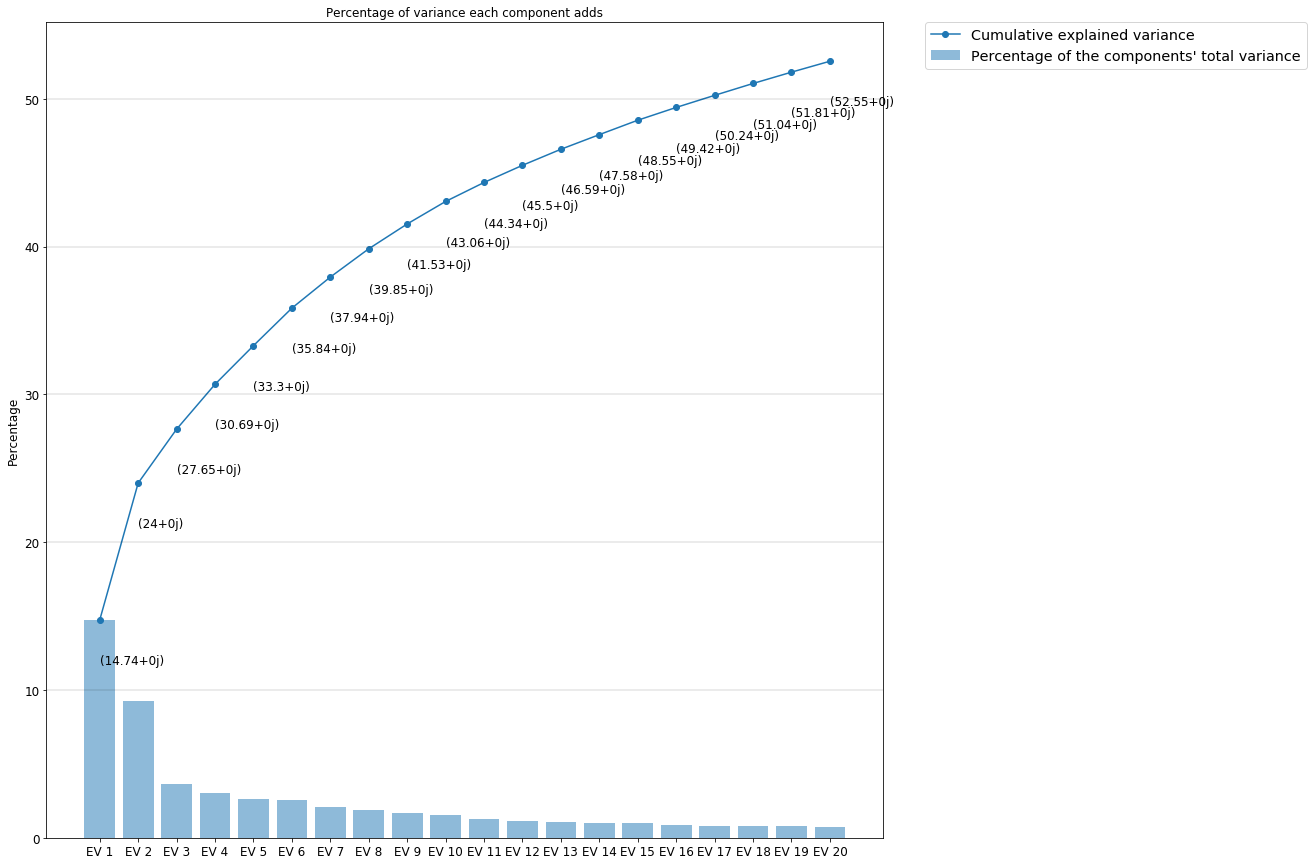

In [19]:
explainedVariance(eigenvalues)

Using this technique it can be seen that the first two Principal Components are the ones that have the most variance compared to the rest, but those two combined still only explain about 24% of the variance of the system.

## Second Approach: Removing the columns with many NaNs

As was mentioned at the beginning of the homework, the only problem with this first approach for the calculation of the eigenvalues is the amount of samples that had to be dropped because of missing information (only 817 rows remained):

In [20]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 3 to 1992
Columns: 1843 entries, population to communityname_791
dtypes: float64(123), uint8(1720)
memory usage: 2.1 MB


The second and third columns ("county" and "community") contained many missing values that would have to be removed from the dataset in order to calculate the covariance matrix. For this, the drop() method can be used:

In [21]:
df_crime = df_crime_second_approach #Restore the saved dataframe
categorical_columns_second = categorical_columns #Make a copy of the original columns in the dataset
df_crime = df_crime.drop(columns = categorical_columns_second[1:3])
categorical_columns_second = list(df_crime.columns.values[0:2]) #Reobtain the column names of the columns that are not averaged
df_crime.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


The labeling of the "communityname" column must be done once more:

In [22]:
from sklearn.preprocessing import LabelEncoder #import the label encoder
labelencoder_df_crime = LabelEncoder() #Create a variable with class LabelEncoder
#Encode the communityname label:
df_crime.loc[:,categorical_columns_second[1]] = labelencoder_df_crime.fit_transform(df_crime.loc[:,categorical_columns_second[1]])
df_crime #Show the DataFrame

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,804,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,1625,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,1787,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,141,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
5,6,1518,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
6,44,839,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,...,0.05,0.08,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.03
7,6,1461,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,...,0.01,0.33,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.55
8,21,668,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,...,0.04,0.17,0.04,NaN,NaN,NaN,NaN,0.00,NaN,0.53
9,29,287,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,...,0.00,0.47,0.11,NaN,NaN,NaN,NaN,0.00,NaN,0.15


The same procedure for casting the objects into numerical type and filling in the NaN with the average of the column can be used:

In [23]:
df_crime = df_crime.apply(pd.to_numeric, errors = 'coerce') #Force the object types as numerical
df_crime = df_crime.fillna(df_crime.mean()) #Replace the NaNs with the average of each column
df_crime.head() #Show the information related to the DataFrame

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,804,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,1625,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,1787,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,141,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


And the Dummy Variables must be obtained again:

In [24]:
df_crime = pd.get_dummies(df_crime,columns=categorical_columns_second) #One Hot Encode the categorical columns
df_crime #Show the DataFrame

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,communityname_1818,communityname_1819,communityname_1820,communityname_1821,communityname_1822,communityname_1823,communityname_1824,communityname_1825,communityname_1826,communityname_1827
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0,0,0,0,0,0,0,0,0,0
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0,0,0,0,0,0,0,0,0,0
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0,0,0,0,0,0,0,0,0,0
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0,0,0,0,0,0,0,0,0,0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0,0,0,0,0,0,0,0,0,0
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0,0,0,0,0,0,0,0,0,0
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0,0,0,0,0,0,0,0,0,0
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0,0,0,0,0,0,0,0,0,0
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0,0,0,0,0,0,0,0,0,0
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0,0,0,0,0,0,0,0,0,0


Calculate the covariance:

In [25]:
df_cov = df_crime.cov() #Obtain the DataFrame's covariance matrix
df_cov #Show the covariance DataFrame

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,communityname_1818,communityname_1819,communityname_1820,communityname_1821,communityname_1822,communityname_1823,communityname_1824,communityname_1825,communityname_1826,communityname_1827
population,0.016105,-0.000959,0.007435,-0.009317,0.004814,0.004609,0.000125,0.002375,0.001597,-0.002320,...,-2.889753e-05,1.166118e-04,6.225400e-06,-2.387997e-05,-8.827285e-06,4.134833e-05,-1.384485e-05,-8.827285e-06,-1.886241e-05,-1.384485e-05
householdsize,-0.000959,0.026803,-0.002785,-0.009425,0.006908,0.017838,0.013224,0.008634,0.008048,-0.017973,...,-5.187917e-05,-2.177380e-05,1.137004e-04,-5.689673e-05,7.857743e-05,-3.180892e-05,-2.679136e-05,-6.191429e-05,4.345450e-05,-5.689673e-05
racepctblack,0.007435,-0.002785,0.064233,-0.049133,-0.005651,-0.003923,0.004812,0.005584,0.005658,0.002404,...,4.116262e-04,4.534426e-05,-8.009478e-05,-8.511234e-05,-6.002453e-05,2.811697e-04,-6.504209e-05,-8.511234e-05,-8.511234e-05,1.523889e-05
racePctWhite,-0.009317,-0.009425,-0.049133,0.059555,-0.013777,-0.025201,-0.007348,-0.009349,-0.007469,0.005968,...,-3.781817e-04,-5.705778e-05,1.820565e-05,1.135393e-04,7.841638e-05,-1.875144e-04,-5.705778e-05,6.838126e-05,7.841638e-05,3.827589e-05
racePctAsian,0.004814,0.006908,-0.005651,-0.013777,0.043630,0.012954,-0.000811,0.003021,0.001835,-0.010181,...,-4.198748e-05,1.320570e-05,2.339784e-04,-4.700504e-05,-1.846986e-06,-6.707529e-05,1.587150e-04,-4.700504e-05,-2.693479e-05,-7.209285e-05
racePctHisp,0.004609,0.017838,-0.003923,-0.025201,0.012954,0.054052,0.005259,0.006871,0.003342,-0.009486,...,-6.724640e-05,8.328045e-05,1.303459e-05,-6.724640e-05,-3.714103e-05,-3.714103e-05,9.331557e-05,2.808727e-05,-5.219371e-05,-6.724640e-05
agePct12t21,0.000125,0.013224,0.004812,-0.007348,-0.000811,0.005259,0.024086,0.018324,0.023116,-0.011428,...,-7.236209e-05,-4.727429e-05,7.918890e-06,-5.730941e-05,-2.218648e-05,-2.116233e-06,-1.215136e-05,-5.229185e-05,2.798914e-05,-1.716892e-05
agePct12t29,0.002375,0.008634,0.005584,-0.009349,0.003021,0.006871,0.018324,0.020610,0.022320,-0.013393,...,-6.215083e-05,-2.201034e-05,-3.706302e-05,-6.716839e-05,-5.211570e-05,-3.204546e-05,2.314772e-05,-8.723864e-05,-1.699277e-05,-2.201034e-05
agePct16t24,0.001597,0.008048,0.005658,-0.007469,0.001835,0.003342,0.023116,0.022320,0.027724,-0.009640,...,-6.837119e-05,-2.823070e-05,-3.826583e-05,-5.331851e-05,-3.324826e-05,-2.321314e-05,1.874666e-06,-7.840632e-05,-4.830095e-05,-1.819558e-05
agePct65up,-0.002320,-0.017973,0.002404,0.005968,-0.010181,-0.009486,-0.011428,-0.013393,-0.009640,0.032107,...,4.858781e-05,6.364049e-05,-1.470971e-04,4.858781e-05,-3.169317e-05,9.876343e-05,-3.169317e-05,1.840620e-04,-1.119742e-04,5.862293e-05


Obtain the eigenvalues:

In [26]:
eigenvalues, eigenvectors = LA.eig(df_cov) #Obtain the eigenvalues and eigenvectors
df_eigenvalues=pd.DataFrame(eigenvalues).transpose() #Make the eigenvalues a DataFrame for easier viewing
df_eigenvalues #Show the DataFrame

,0,1,2,3,4,5,6,7,8,9,...,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
0,(1.1081493439363908+0j),(0.8170192245973037+0j),(0.34470493473418445+0j),(0.3022107075947973+0j),(0.19394895918773444+0j),(0.18658085127756413+0j),(0.15040692143811213+0j),(0.1325408436504522+0j),(0.11797199782052033+0j),(0.0948205241743673+0j),...,(0.0005017561465127934+0j),(0.0005017561465127931+0j),(0.0005017561465127938+0j),(0.0005017561465127937+0j),(0.0005017561465127931+0j),(0.0005017561465127933+0j),(0.0005017561465127936+0j),(0.000501756146512794+0j),(0.0005017561465127934+0j),(0.0005017561465127936+0j)


The top 20 as asked in the homework's tasks:

In [27]:
eigenvalues[0:20] #Show the first 20 eigenvalues

array([1.10814934+0.j, 0.81701922+0.j, 0.34470493+0.j, 0.30221071+0.j,
       0.19394896+0.j, 0.18658085+0.j, 0.15040692+0.j, 0.13254084+0.j,
       0.117972  +0.j, 0.09482052+0.j, 0.08754718+0.j, 0.07939749+0.j,
       0.0704284 +0.j, 0.06195323+0.j, 0.06051026+0.j, 0.05266922+0.j,
       0.05126451+0.j, 0.0456274 +0.j, 0.04296812+0.j, 0.03984855+0.j])

In an easier to read list:

In [28]:
df_eigenvalues.iloc[0,:20] #Show the 20 first eigenvalues as a list

0       (1.1081493439363908+0j)
1       (0.8170192245973037+0j)
2      (0.34470493473418445+0j)
3       (0.3022107075947973+0j)
4      (0.19394895918773444+0j)
5      (0.18658085127756413+0j)
6      (0.15040692143811213+0j)
7       (0.1325408436504522+0j)
8      (0.11797199782052033+0j)
9       (0.0948205241743673+0j)
10     (0.08754717838658346+0j)
11     (0.07939749017698862+0j)
12     (0.07042839791717119+0j)
13     (0.06195322600779795+0j)
14     (0.06051025780142793+0j)
15     (0.05266921657263386+0j)
16    (0.051264510768359195+0j)
17      (0.0456273974180877+0j)
18    (0.042968120483200915+0j)
19    (0.039848546250941974+0j)
Name: 0, dtype: complex128

And using the 'explained variance' described in [8]:

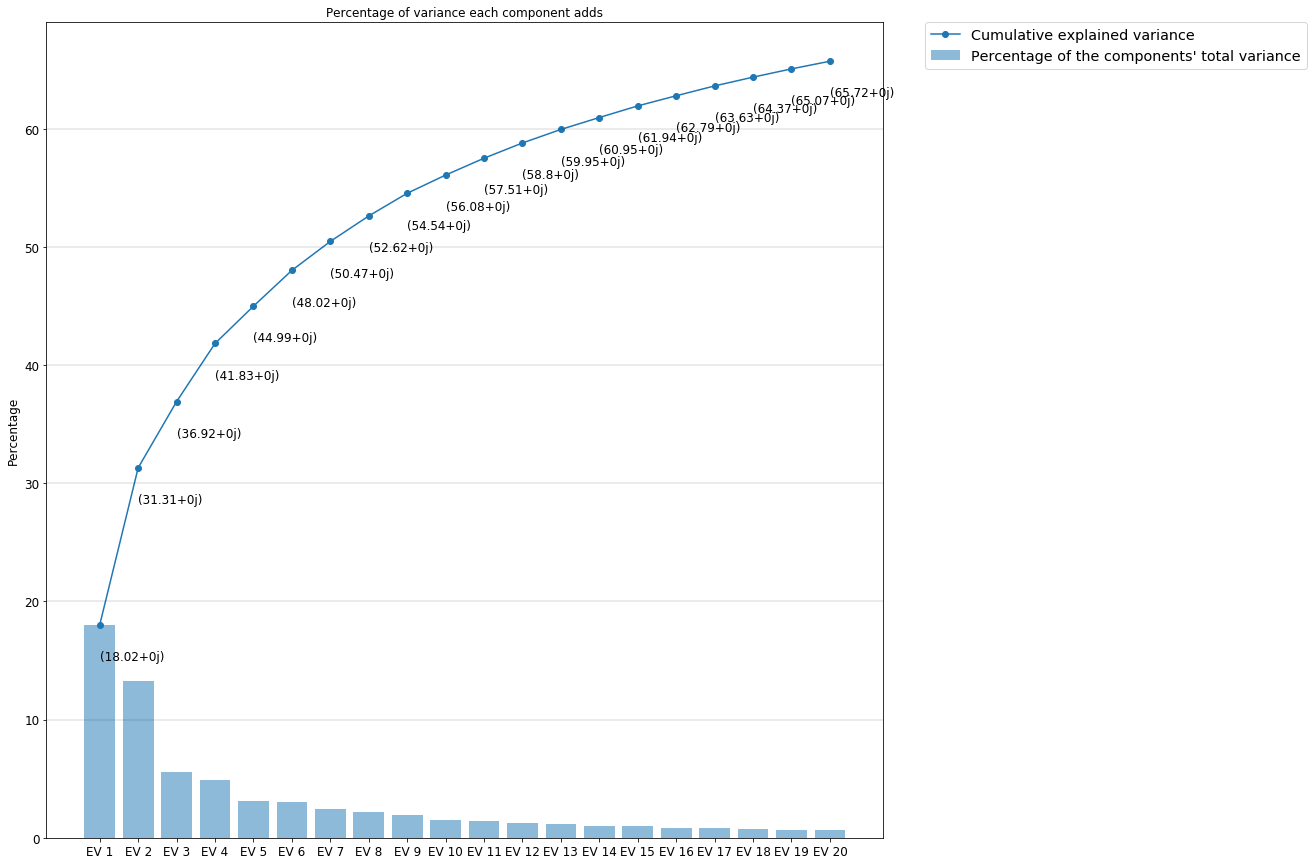

In [29]:
explainedVariance(eigenvalues)

In this second approach, again the first two components are the ones bringing the most variance to the system, but at the same time those two combined only represent about 31% of the total variance. This may be caused by the amount of Dummy Variables in the system, so a third approach can be considered: what if the only categorical values used in the system is the "states" column?

## Third approach: Removing the 2nd up to the 4th columns
A third approach can be considered by removing the "county", "community", and "communityname" features, or the second, third and fourth columns, respectively. This in turn would reduce the amount of dummy variables created during the categorical encoding process, and in turn end up generating less eigenvectors and eigenvalues.
The third approach then goes as follows:

In [30]:
df_crime = df_crime_second_approach #Restore the saved dataframe
categorical_columns_third = categorical_columns #Make a copy of the original columns in the dataset
df_crime = df_crime.drop(columns = categorical_columns_third[1:4]) #Drop all but the first categorical columns
categorical_columns_third = list(df_crime.columns.values[0:2]) #Reobtain the column names of the columns that are not averaged
df_crime.head()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


After removing the second, third and fourth columns, cast again the DataFrame objects and fill the missing values:

In [31]:
df_crime = df_crime.apply(pd.to_numeric, errors = 'coerce') #Force the object types as numerical
df_crime = df_crime.fillna(df_crime.mean()) #Replace the NaNs with the average of each column
df_crime.head() #Show the information related to the DataFrame

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,53,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,24,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,34,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,42,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


Add the Dummy Variables for the "state" feature:

In [32]:
df_crime = pd.get_dummies(df_crime,columns = categorical_columns_third) #One Hot Encode the categorical columns
df_crime #Show the DataFrame

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,...,population_0.7,population_0.73,population_0.74,population_0.78,population_0.8,population_0.81,population_0.91,population_0.96,population_0.99,population_1.0
0,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,...,0,0,0,0,0,0,0,0,0,0
1,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,...,0,0,0,0,0,0,0,0,0,0
2,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,...,0,0,0,0,0,0,0,0,0,0
3,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,...,0,0,0,0,0,0,0,0,0,0
4,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,...,0,0,0,0,0,0,0,0,0,0
5,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,0.04,...,0,0,0,0,0,0,0,0,0,0
6,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,0.02,...,0,0,0,0,0,0,0,0,0,0
7,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,0.00,...,0,0,0,0,0,0,0,0,0,0
8,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,0.04,...,0,0,0,0,0,0,0,0,0,0
9,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,0.02,...,0,0,0,0,0,0,0,0,0,0


Calculate the covariance

In [33]:
df_cov = df_crime.cov() #Obtain the DataFrame's covariance matrix
df_cov #Show the covariance DataFrame

,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,...,population_0.7,population_0.73,population_0.74,population_0.78,population_0.8,population_0.81,population_0.91,population_0.96,population_0.99,population_1.0
householdsize,0.026803,-0.002785,-0.009425,0.006908,0.017838,1.322396e-02,0.008634,0.008048,-0.017973,-0.000999,...,-6.863541e-05,-7.194942e-05,-1.271426e-04,-1.675624e-05,-4.686161e-05,-3.407110e-06,-5.187917e-05,-8.368809e-05,-2.177380e-05,-0.000133
racepctblack,-0.002785,0.064233,-0.049133,-0.005651,-0.003923,4.811952e-03,0.005584,0.005658,0.002404,0.007264,...,1.910398e-04,3.029158e-05,3.530914e-05,4.116262e-04,3.664682e-04,-4.478564e-05,1.607482e-04,8.232525e-04,2.059062e-04,0.001463
racePctWhite,-0.009425,-0.049133,0.059555,-0.013777,-0.025201,-7.348095e-03,-0.009349,-0.007469,0.005968,-0.009241,...,-2.194843e-04,-1.022158e-04,-8.716315e-05,-3.781817e-04,-2.627778e-04,-1.141156e-04,-1.624266e-04,-6.861176e-04,-1.574090e-04,-0.002112
racePctAsian,0.006908,-0.005651,-0.013777,0.043630,0.012954,-8.110675e-04,0.003021,0.001835,-0.010181,0.005374,...,-2.376422e-05,1.822326e-05,-6.864547e-06,-1.689967e-05,-4.700504e-05,2.421665e-04,8.345156e-05,-7.393983e-05,-2.191723e-05,0.001306
racePctHisp,0.017838,-0.003923,-0.025201,0.012954,0.054052,5.258592e-03,0.006871,0.003342,-0.009486,0.004590,...,8.126235e-05,1.434912e-04,1.434912e-04,-4.215859e-05,-3.212347e-05,3.873336e-04,2.808727e-05,-8.933474e-05,-1.707078e-05,0.001213
agePct12t21,0.013224,0.004812,-0.007348,-0.000811,0.005259,2.408571e-02,0.018324,0.023116,-0.011428,-0.000425,...,-2.932027e-05,5.307694e-05,-6.232697e-05,2.798914e-05,-1.716892e-05,7.850949e-07,1.795401e-05,-4.232467e-06,7.918890e-06,-0.000123
agePct12t29,0.008634,0.005584,-0.009349,0.003021,0.006871,1.832397e-02,0.020610,0.022320,-0.013393,0.002074,...,3.626031e-05,1.184814e-04,-2.201034e-05,1.813016e-05,-1.940090e-06,5.131300e-05,1.134638e-04,5.131300e-05,3.318284e-05,0.000396
agePct16t24,0.008048,0.005658,-0.007469,0.001835,0.003342,2.311582e-02,0.022320,0.027724,-0.009640,0.001166,...,-6.285792e-06,1.122610e-04,-3.324826e-05,1.190979e-05,-1.317802e-05,2.883714e-05,1.072435e-04,4.890738e-05,1.692735e-05,0.000170
agePct65up,-0.017973,0.002404,0.005968,-0.010181,-0.009486,-1.142826e-02,-0.013393,-0.009640,0.032107,-0.002438,...,-6.338635e-05,-1.069566e-04,8.447319e-06,-6.605366e-06,1.848244e-05,-5.335122e-05,-3.671073e-05,-2.324585e-05,-1.664049e-05,-0.000502
numbUrban,-0.000999,0.007264,-0.009241,0.005374,0.004590,-4.253123e-04,0.002074,0.001166,-0.002438,0.016450,...,6.381613e-04,3.391509e-04,3.391509e-04,3.642387e-04,3.692563e-04,7.535653e-04,4.244495e-04,9.040921e-04,4.645900e-04,0.006105


Obtain the eigenvalues:

In [34]:
eigenvalues, eigenvectors = LA.eig(df_cov) #Obtain the eigenvalues and eigenvectors
df_eigenvalues = pd.DataFrame(eigenvalues).transpose() #Make the eigenvalues a DataFrame for easier viewing
df_eigenvalues #Show the DataFrame

,0,1,2,3,4,5,6,7,8,9,...,224,225,226,227,228,229,230,231,232,233
0,1.108278,0.833216,0.353297,0.301998,0.218644,0.198431,0.188034,0.156358,0.145224,0.132105,...,0.000503,0.000457,0.000463,0.000468,0.000473,0.000499,0.000495,0.000483,0.000485,0.000489


Show the first 20 values:

In [35]:
eigenvalues[0:20] #Show the first 20 eigenvalues

array([1.10827832, 0.83321575, 0.35329722, 0.30199773, 0.21864443,
       0.19843064, 0.18803417, 0.15635842, 0.14522415, 0.13210545,
       0.11777925, 0.10415843, 0.09287837, 0.08633899, 0.07742722,
       0.07194844, 0.06800164, 0.06019871, 0.0594921 , 0.05546149])

Show them in a list format:

In [36]:
df_eigenvalues.iloc[0,:20] #Show the 20 first eigenvalues as a list

0     1.108278
1     0.833216
2     0.353297
3     0.301998
4     0.218644
5     0.198431
6     0.188034
7     0.156358
8     0.145224
9     0.132105
10    0.117779
11    0.104158
12    0.092878
13    0.086339
14    0.077427
15    0.071948
16    0.068002
17    0.060199
18    0.059492
19    0.055461
Name: 0, dtype: float64

The first 10 eigenvalues still explain an order of magnitude more variance than the rest, so a cut-off point of in about the 10th element can still be considered.
Calculating the explained variance:

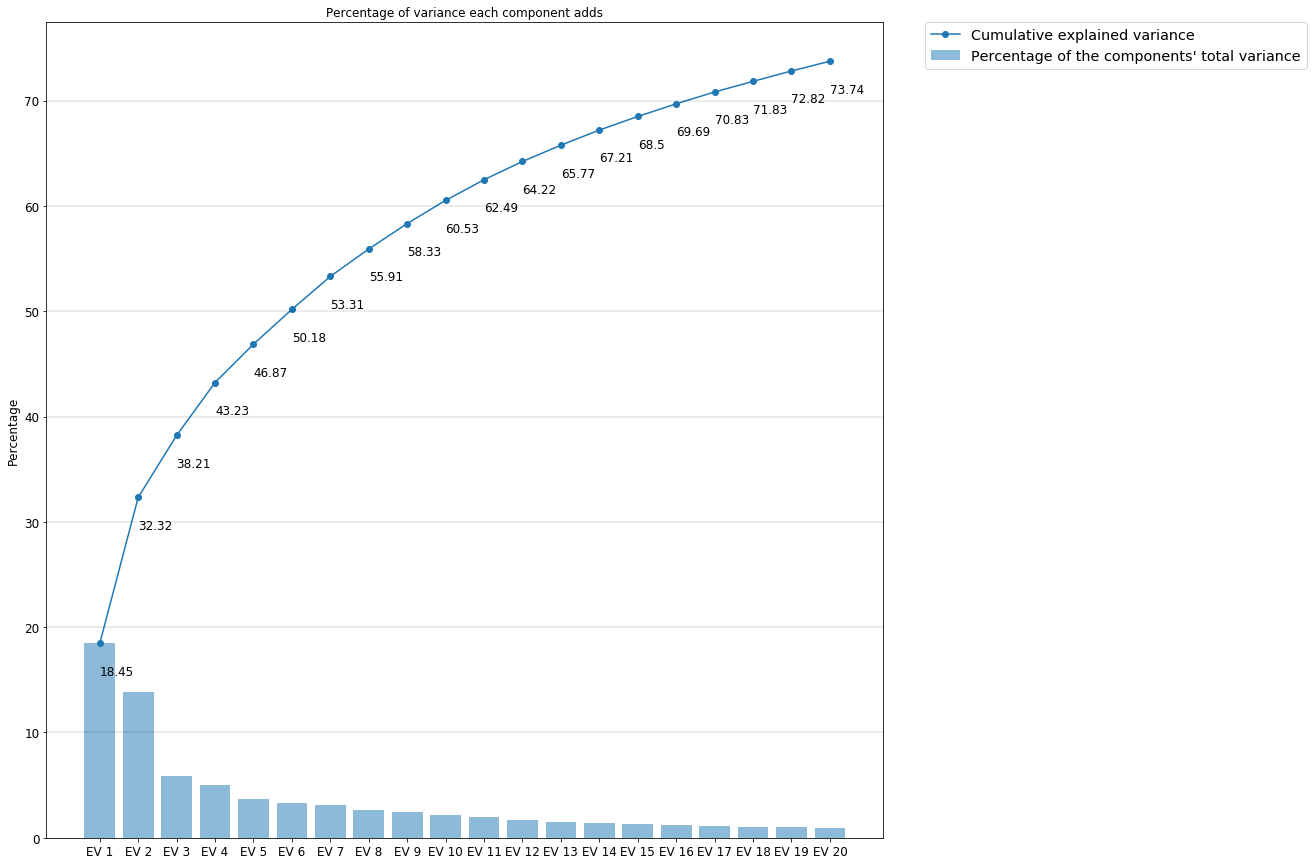

In [37]:
explainedVariance(eigenvalues)

In this case the first 20 principal components explain a higher percentage of the variance in the data, and there is still a big disparity in the amount of variance the first and second components apport compared with the rest.

## References

[1] Pandas Project, "Tutorials - pandas 0.23.4 documentation," Documentation on the use of the pandas library. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/tutorials.html. [Accessed January 23, 2019].

[2] The Scipy Community, "Statistics - NumPy v1.14.1 Manual," Documentation on the use of the NumPy library, Apr. 16, 2018. [Online]. Available: https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.statistics.html. [Accessed January 23, 2019].

[3] C. Detar, "Numpy eigenvalues and eigenvectors," University of Utah Physics and Astronomy Department, Dec. 5 2017. [Online]. Available: http://www.physics.utah.edu/~detar/lessons/python/numpy_eigen/node1.html. [Accessed January 24, 2019].

[4] The Matplotlib Development Team, "matplotlib.pyplot.hist - Matplotlib 3.0.2 documentation," Documentation on the use of the Matplotlib library, Nov. 11, 2018. [Online]. Available: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html. [Accessed January 23, 2019].

[5] M. Redmond, "Communities and Crime," Socioeconomic census and crime reports data, Jul. 13, 2009.  [Online]. Available: http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data. [Accessed January 23, 2019].

[6] M. Redmond, "Communities and Crime," Information regarding the Communities and Crime Data Set, Jul. 13, 2009.  [Online]. Available: http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.names. [Accessed January 23, 2019].

[7] A. Kassambara, "Principal component analysis : the basics you should read - R software and data mining," Statistical tools for high-throughput data analysis. [Online]. Available: http://www.sthda.com/english/wiki/print.php?id=206. [Accessed January 24, 2019].

[8] S. Raschka, "Principal Component Analysis in Python," Plotly, 2018 [Online]. Available: https://plot.ly/ipython-notebooks/principal-component-analysis/. [Accessed January 25, 2019].